In [36]:
from matplotlib import pyplot as plt
from math import floor, exp
import math
from scipy.special import expit

plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'figure.max_open_warning': 0})

In [37]:
# %%
# will return bandwidth in Bytes/sec.
def convBandwidth(input):
    if input[-4:] == "Mbps" : return ((10**6) * float(input[:-4]))/8
    elif input[-4:] == "MBps" : return (10**6) * float(input[:-4])
    elif input[-3:] == "Bps" : return float(input[:-3])
    elif input[-3:] == "bps"    : return float(input[:-3])/8
    else:
        print("conversion not supported")
        return -1
# will return time in sec.
def convTime(input):
    if input[-2:] == "ms" : return (10**(-3) * float(input[:-2]))
    elif input[-1:] == "s" : return float(input[:-1])
    elif input[-3:] == "sec" : return float(input[:-3])
    else:
        print("conversion not supported")
        return -1

# values_dict is a time series data dictionary
def plotvstime(values_dict, xlabel, ylabel, title):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    plt.plot(values_dict.keys(), values_dict.values())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
def plotlist(list_values, xlabel, ylabel, title, part = 0):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    time = range(len(list_values))
    part_ind = int(len(list_values) * part)
    plt.plot(time[part_ind:], list_values[part_ind:])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

def plot_queue(list_values, xlabel, ylabel, title, part = 0):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    time = range(len(list_values))
    part_ind = int(len(list_values) * part)
    plt.plot(time[part_ind:], list_values[part_ind:])
    plt.axhline(y = (maxQDelay), color='r')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
def plotvstime_n(values_dict_n, xlabel, ylabel, title, n_flows):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    for i in range(n_flows):
        plt.plot(values_dict_n[i].keys(), values_dict_n[i].values())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
def plotvstime_n_avg(values_dict_n, xlabel, ylabel, title, n_flows):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    avg_values = {}
    for t in values_dict_n[0].keys():
        
        temp_sum = 0
        for i in range(n_flows):
            temp_sum = temp_sum + values_dict_n[i][t]
            
        avg_values[t] = temp_sum/n_flows
        #print(avg_values)
   
    plt.plot(avg_values.keys(), avg_values.values())
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.title(title)
    
def plotvstime_avg_each_flow(values_dict_n, xlabel, ylabel, title, n_flows):
    f = plt.figure()
    f.set_figwidth(25)
    f.set_figheight(6)
    
    value_each_flow = {}
    
    for i in range(n_flows):
        value_each_flow[i+1]= sum(values_dict_n[i].values())/len(values_dict_n[i].keys())
    
    plt.bar(value_each_flow.keys(), value_each_flow.values())
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.title(title)

In [50]:
def timeToSteps(t):
    return int(t/step)

def lookback_x(t):
    t_steps = timeToSteps(t)
    return x[-t_steps] if len(x) > t_steps else x[0]

def lookback_q_delay(t):
    t_steps = timeToSteps(t)
    return q_delay[-t_steps] if len(q_delay) > t_steps else q_delay[0]

# For z < 0, returns 0 and for z > 0 , return z
# return ((z*exp(z))/(exp(z)+1))
def delta_check(z):
    if z < 0: return z
    else: return 0
    

def signum(x):
    if ( x > 0): return 1
    else: return -1

def rate_q_next():
    return ((1/C)*(x[-1]-C))

def SR_2phase_pacing():
    temp = ((1.25*T)/(T+q_delay[-1]))
    return temp

def SR_2phase_cong():
    return ((2*T)/tau_min[-1])

def SR_2phase():
    return min(SR_2phase_cong(), SR_2phase_pacing()) * x[-1]

def SR_RTTprobe():
    return (4 * pktSize * 8)/(T+lookback_q_delay(T))
    #return (tau_min[-1]/(0.4*(T+q_delay[-1]))) * ( lookback_x(T+q_delay[-1]) * (T+lookback_q_delay(T+q_delay[-1])))

def x_next():
    if mode == "probe_bwn":
        return SR_2phase()
    else:  return SR_RTTprobe()
    
    #return (1-math.exp(-k*t_prt)) * SR_RTTprobe + (1-math.exp(-k*t_pbw)) * SR_2phase

def t_pbw_next(t_pbw):
    return (t_pbw - 1 + (10 - t_pbw + 1)*(signum(tau_min[-1]-(T + lookback_q_delay(T)))+1)/2)

def tau_min_next():
    return (delta_check(T+lookback_q_delay(T) - tau_min[-1]) + tau_min[-1])

def SRtoCwnd():
    if mode == "probe_rtt":
        return 4
    else:
        return x[-1]*(T+lookback_q_delay(T))


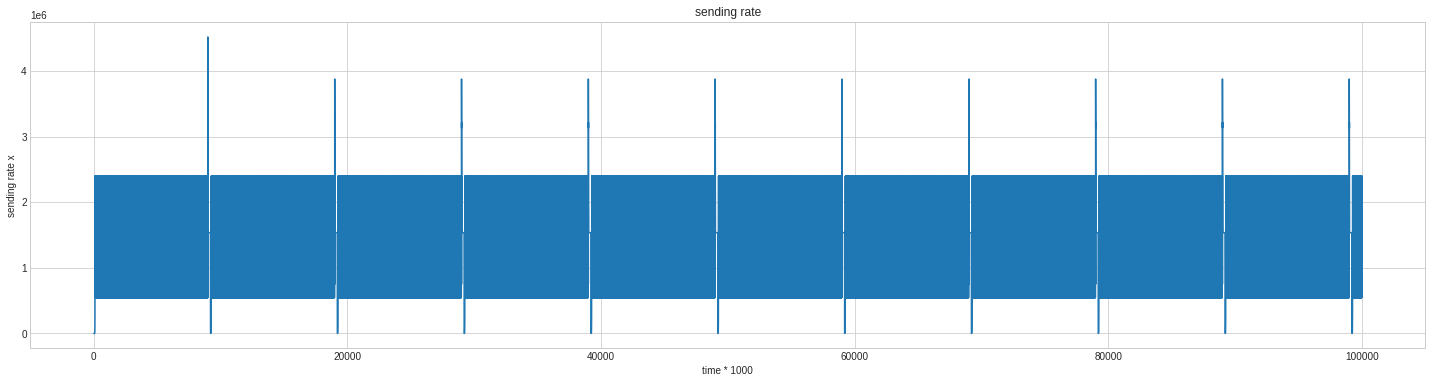

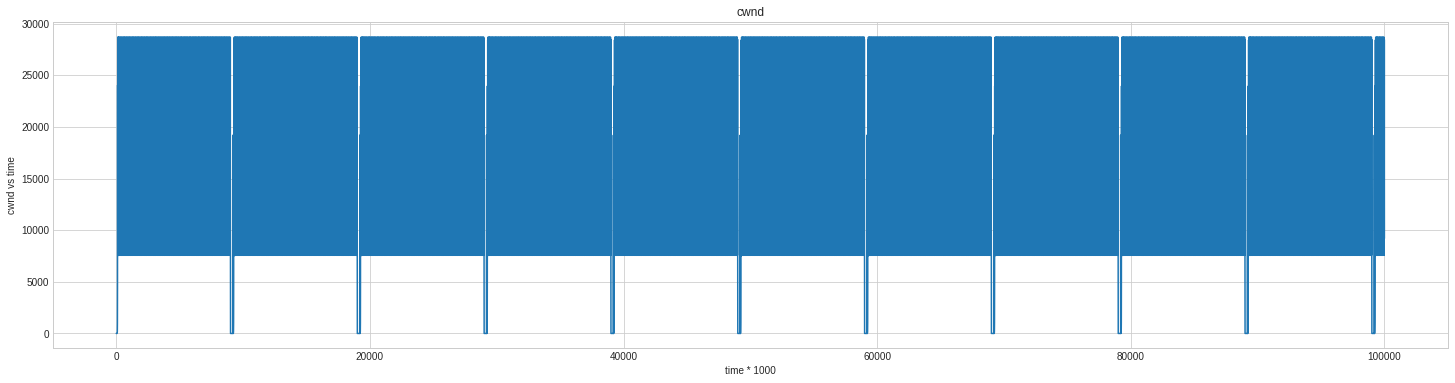

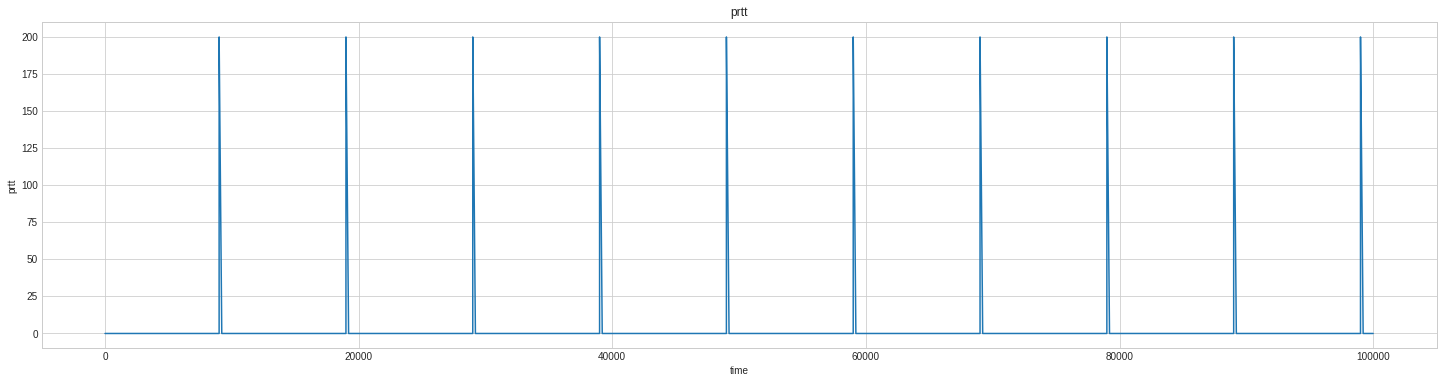

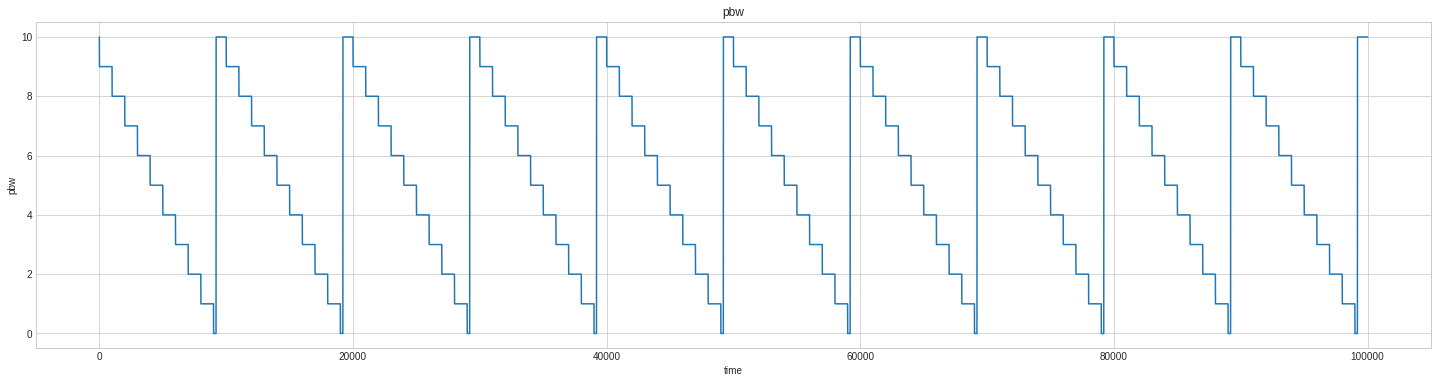

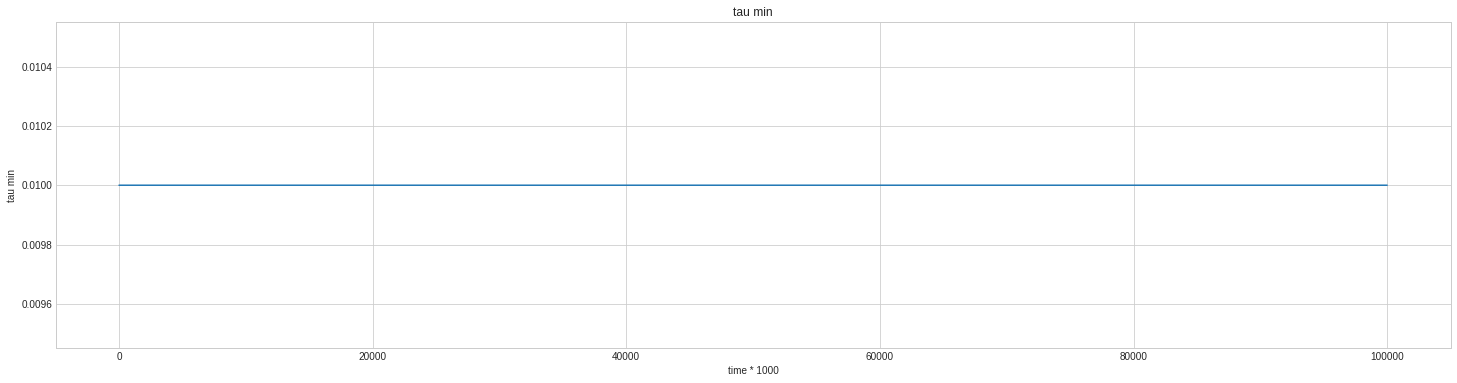

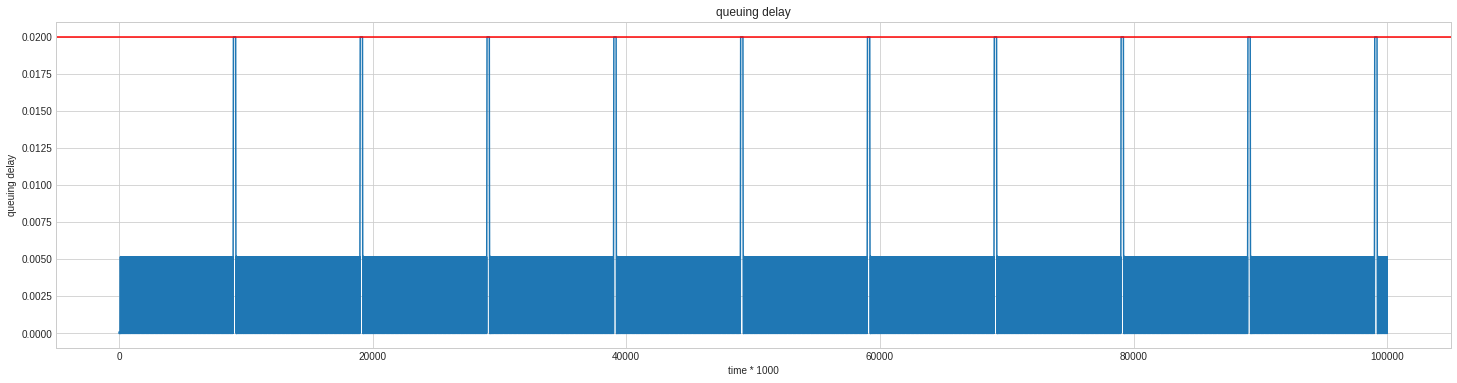

In [51]:
# CONFIG
start = 0

# needs to be smaller than the smallest value of time ( T in sec. )
step = 0.001

end = 100 / step

x = [0.0001]

t_pbw = convTime("10sec")
t_prt = convTime("0sec")
C = convBandwidth("10Mbps")
T = convTime("10ms")
pktSize = 1440   # in Bytes
BDP = C*T # in Mb
maxQDelay = (2 * BDP)/C
T_steps = int(T / step)
q_delay = [0.0001]
tau_min = [T]
mode = "probe_bwn"
cwnd = [10]
t_pbw_store = []
t_rtt_store = []
t = 0
while t < end:
    
    x.append(x_next())
    cwnd.append(SRtoCwnd())
    
    #TODO: Need to fix this
    q_delay.append(min(maxQDelay, max(0, (rate_q_next()*step) + q_delay[-1])))
    
    tau_min.append(tau_min_next())
    
    t_pbw_store.append(t_pbw)
    
    t_rtt_store.append(t_prt)
    
    
    # happens every 0.001 sec
    if mode == "probe_rtt":
        t_prt -= 1
        # probe rtt has finished and set a new tau min, no go to probe bandwidth
        if t_prt == 0:
            mode = "probe_bwn"
            t_pbw = 10 
    

    
    # checks for every second        
    elif t % 1000 == 0 and mode == "probe_bwn":
            # if new min RTT found then reset to 10 otherwise reduce by 1
            t_pbw = t_pbw_next(t_pbw)
            
            # Timer has expired and no min RTT was found till now, need to go to probe rtt
            if t_pbw == 0: 
                mode = "probe_rtt"
                t_prt = 200
    
    #print("t_pbw:",t_pbw," "," t_prt:",t_prt)  
        
    t += 1



plotlist(x, "time * " + str(int(1/step)), "sending rate x", "sending rate")
plotlist(cwnd, "time * " + str(int(1/step)), "cwnd vs time", "cwnd")
plotlist(t_rtt_store, "time", "prtt", "prtt")


plotlist(t_pbw_store, "time", "pbw", "pbw", part = 0)

plotlist(tau_min, "time * " + str(int(1/step)), "tau min", "tau min", part = 0)

plot_queue(q_delay, "time * " + str(int(1/step)), "queuing delay", "queuing delay", part = 0
         )
